#### http://yann.lecun.com/exdb/mnist/ 에서 손글씨 데이터 추출하기

In [8]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]='1' 

In [9]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


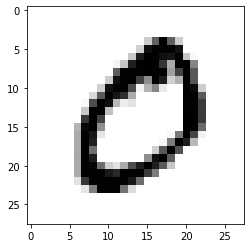

0


In [10]:
i=1

import matplotlib.pyplot as plt

plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()
print(train_labels[i])

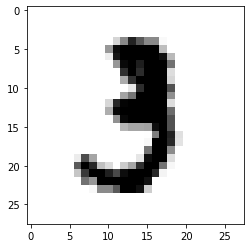

3


In [11]:
j=10

import matplotlib.pyplot as plt

plt.imshow(train_images[j], cmap=plt.cm.binary)
plt.show()
print(train_labels[j])

## 데이터를 학습에 맞도록 크기를 변환
- 1. $28\times 28 = 764$ 로 flatten 시켜준다.
- 2. 각 픽셀의 크기를 $0\le f \le 255$ 에서 $0\le f \le 1$로 크기를 조정해 준다.
- 3. label을 one-hot encoding 을 시켜준다. (해당값을 1로, 그 나머지를 0으로 변환)

In [12]:
from keras.utils import to_categorical

train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
print(train_labels[i])
print(train_labels[j])
print(train_images.shape)
print(train_labels.shape)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(60000, 28, 28)
(60000, 10)


## Q1 : Hidden Layer가 1개인 shallow network 을 사용하여 학습시켜라.
- 1. 은닉층의 노드를 100개로 정한다.
- 2. learning_rate 를 적절히 조정한다.
- 3. 미니배치의 개수는 100으로 고정하고, 총 에포크는 10 번으로 반복시킨다.
- 4. 은닉층의 활성화 함수는 ReLu 를 사용한다. 

In [18]:
from keras import models
from keras import layers

model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28))) # Neural Network에 입력하기 위해 2차원 배열을 1차원 배열로 flatten 시킴
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

### cost function을 최소화 시키는 방법: RMSprop을 사용

In [7]:
from keras import optimizers

model.compile(optimizers.RMSprop(learning_rate=0.001,rho=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history1= model.fit(train_images,train_labels,epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.9101 - val_loss: 0.1815 - val_accuracy: 0.9466
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1620 - accuracy: 0.9534 - val_loss: 0.1340 - val_accuracy: 0.9604
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1190 - accuracy: 0.9652 - val_loss: 0.1102 - val_accuracy: 0.9677
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9729 - val_loss: 0.0960 - val_accuracy: 0.9719
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9772 - val_loss: 0.0898 - val_accuracy: 0.9748
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9804 - val_loss: 0.0827 - val_accuracy: 0.9754
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0911 - val_accuracy: 0.9737
Epoch 

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test accuracy=',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0772 - accuracy: 0.9771
test accuracy= 0.9771000146865845


In [ ]:
history1_dict= history1.history
history1_dict.keys()

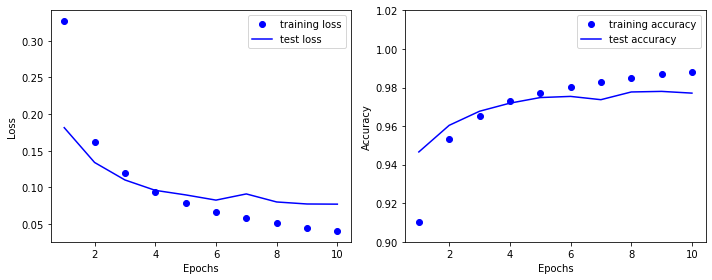

In [9]:
history1_dict= history1.history

loss = history1_dict['loss']
val_loss = history1_dict['val_loss']

accuracy = history1_dict['accuracy']
val_accuracy = history1_dict['val_accuracy']

epochs = range(1, len(loss)+1)


plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'bo',label='training loss')
plt.plot(epochs, val_loss, 'b', label='test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'bo',label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

### RMSprop 대신 ADAM optimizer 사용

In [ ]:
model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2= 0.999),loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2= model.fit(train_images,train_labels,epochs=10, batch_size=100, verbose=0, validation_data=(test_images, test_labels))

In [ ]:
history2_dict= history2.history

loss2 = history2_dict['loss']
val_loss2 = history2_dict['val_loss']

accuracy2 = history2_dict['accuracy']
val_accuracy2 = history2_dict['val_accuracy']

epochs2 = range(1, len(loss2)+1)

plt.figure(figsize=(10, 4))

plt.subplot(121)

plt.plot(epochs, loss, 'ro',label='training loss with RMSprop')
plt.plot(epochs, val_loss, 'r', label='test loss with RMSprop')
plt.plot(epochs, loss2, 'bo',label='training loss with ADAM')
plt.plot(epochs, val_loss2, 'b', label='test loss with ADAM')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(122)

plt.plot(epochs, accuracy, 'ro',label='training accuracy with RMSprop')
plt.plot(epochs, val_accuracy, 'r', label='test accuracy with RMSprop')
plt.plot(epochs, accuracy2, 'bo',label='training accuracy with ADAM')
plt.plot(epochs, val_accuracy2, 'b', label='test accuracy with ADAM')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()

### Loss function을 Mean Square Error (MSE) 로 하는 경우: $\mathcal{L} = -\sum t_i \log y_i \to \mathcal{L} = \frac{1}{n}\sum(y_i -t_i)^2$

In [ ]:
model=models.Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

#model.compile(optimizers.Adam(learning_rate=0.001,beta_1=0.9, beta_2= 0.999),loss='mse',metrics=['accuracy'])
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
history3= model.fit(train_images,train_labels,epochs=10, batch_size=100, verbose=0, validation_data=(test_images, test_labels))

In [ ]:
history3_dict= history3.history

loss3 = history3_dict['loss']
val_loss3 = history3_dict['val_loss']

accuracy3 = history3_dict['accuracy']
val_accuracy3 = history3_dict['val_accuracy']

epochs3 = range(1, len(loss3)+1)

plt.figure(figsize=(14, 4))

plt.subplot(131)

plt.plot(epochs3, loss2, 'ro',label='training loss with cross entropy')
plt.plot(epochs3, val_loss2, 'r', label='test loss with cross entropy')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(132)
 
plt.plot(epochs3, loss3, 'bo',label='training loss with MSE')
plt.plot(epochs3, val_loss3, 'b', label='test loss with MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()

plt.subplot(133)

plt.plot(epochs3, accuracy2, 'ro',label='training accuracy with cross entropy')
plt.plot(epochs3, val_accuracy2, 'r', label='test accuracy with cross entropy')
plt.plot(epochs3, accuracy3, 'bo',label='training accuracy with MSE')
plt.plot(epochs3, val_accuracy3, 'b', label='test accuracy with MSE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim((0.9,1.02)) 
plt.legend()

plt.tight_layout()
plt.show()